In [6]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

#Now let’s load the dataset into the panda’s data frame and print its first five rows.

In [5]:
df = pd.read_csv("C:/Users/harit/Downloads/Food Delivery Time Prediction Case Study.csv")
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30


In [7]:
#Now let’s check the size of the dataset.

In [9]:
df.shape

(45593, 11)

In [10]:
#Let’s check which column of the dataset contains which type of data.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  int64  
 3   Delivery_person_Ratings      45593 non-null  float64
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Type_of_order                45593 non-null  object 
 9   Type_of_vehicle              45593 non-null  object 
 10  Time_taken(min)              45593 non-null  int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 3.8+ MB


In [15]:
#Let’s explore the type of data present in each of the columns present in the dataset.

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Delivery_person_Age,45593.0,29.544075,5.696793,15.000000,25.000000,29.000000,34.000000,50.000000
Delivery_person_Ratings,45593.0,4.632367,0.327708,1.000000,4.600000,4.700000,4.800000,6.000000
Restaurant_latitude,45593.0,17.017729,8.185109,-30.905562,12.933284,18.546947,22.728163,30.914057
Restaurant_longitude,45593.0,70.231332,22.883647,-88.366217,73.170000,75.898497,78.044095,88.433452
Delivery_location_latitude,45593.0,17.465186,7.335122,0.010000,12.988453,18.633934,22.785049,31.054057
Delivery_location_longitude,45593.0,70.845702,21.118812,0.010000,73.280000,76.002574,78.107044,88.563452
Time_taken(min),45593.0,26.294607,9.383806,10.000000,19.000000,26.000000,32.000000,54.000000


Exploratory Data Analysis

EDA  is an approach to analysing the data using visual techniques. It is used to discover trends, and patterns, or to check assumptions with the help of statistical summaries and graphical representations.  Now let’s check the number of null values in the dataset columns wise.

In [16]:
df.isnull().sum()


ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Type_of_order                  0
Type_of_vehicle                0
Time_taken(min)                0
dtype: int64

In [20]:
missing_data = df.isnull()
missing_data.head(5)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False


Let’s draw the histogram to visualise the distribution of the data with continuous values in the columns of the dataset.

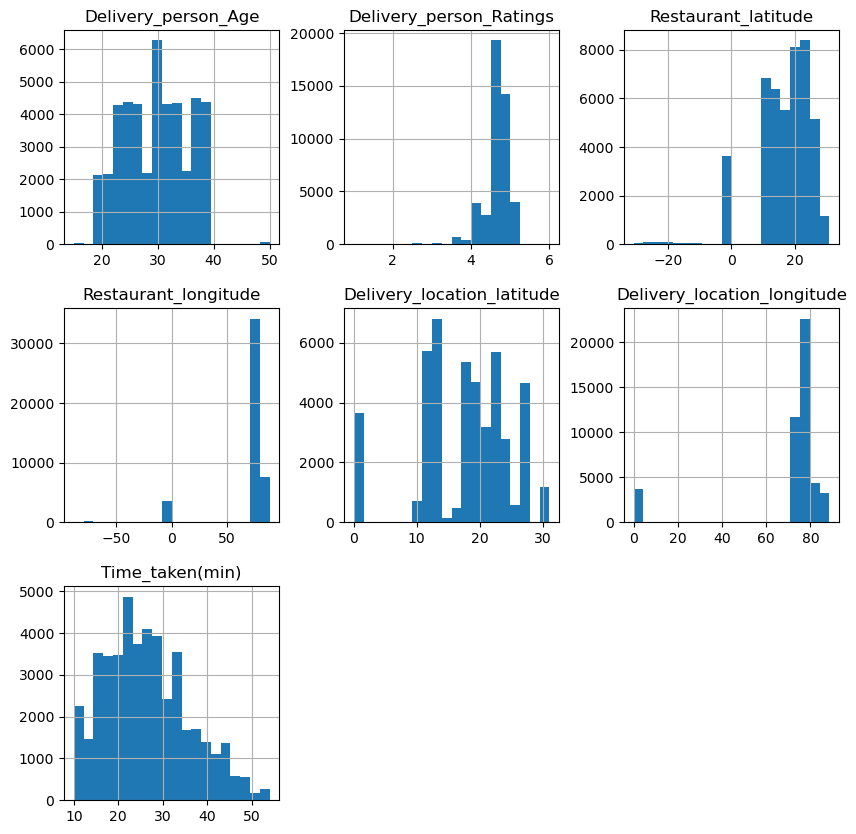

In [18]:
df.hist(bins=20, figsize=(10, 10))
plt.show()


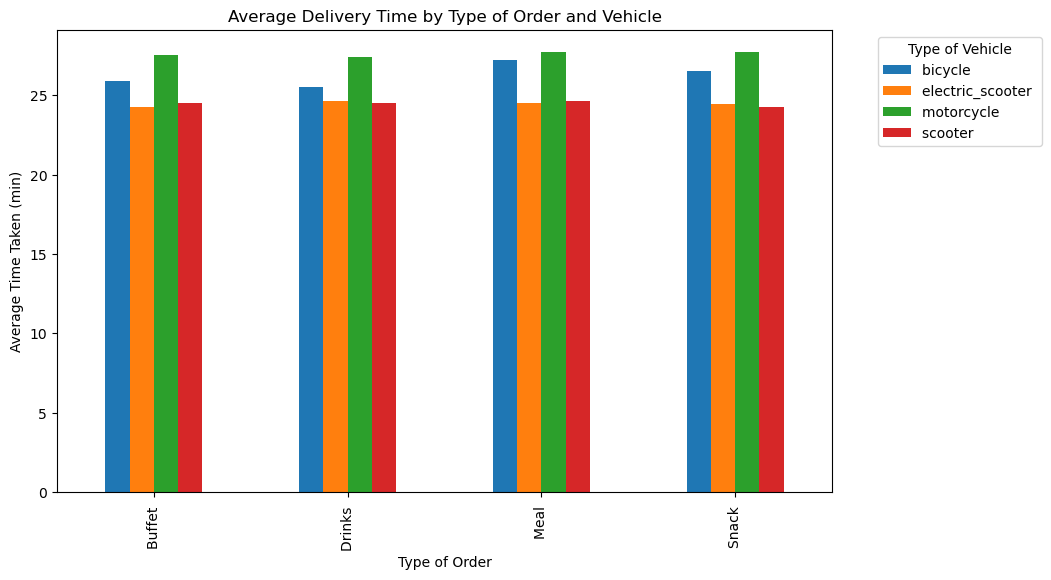

In [21]:
grouped_data = df.groupby(['Type_of_order', 'Type_of_vehicle'])['Time_taken(min)'].mean().reset_index()

# Pivoting for grouped bar chart
pivot_data = grouped_data.pivot(index='Type_of_order', columns='Type_of_vehicle', values='Time_taken(min)')

# Plot grouped bar chart
pivot_data.plot(kind='bar', figsize=(10, 6))

plt.title('Average Delivery Time by Type of Order and Vehicle')
plt.xlabel('Type of Order')
plt.ylabel('Average Time Taken (min)')
plt.legend(title='Type of Vehicle', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

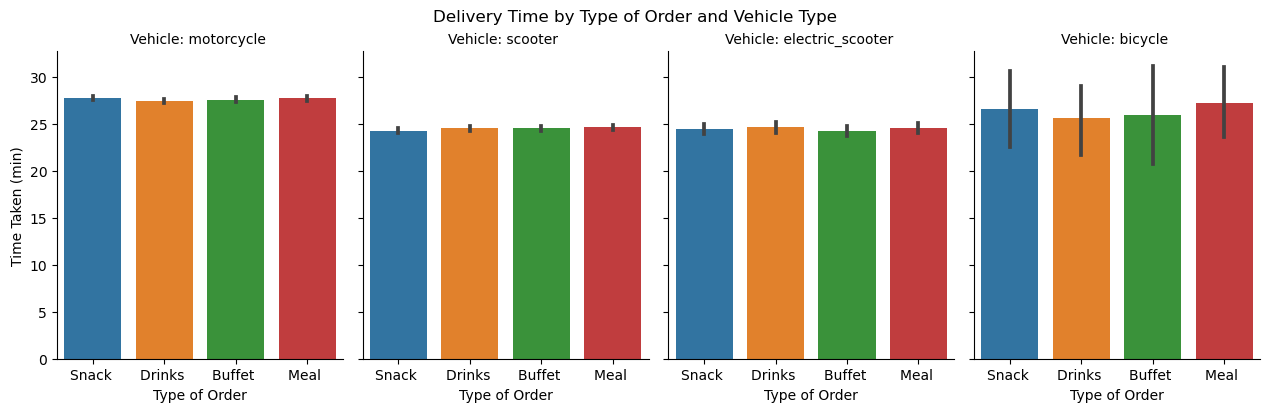

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot faceted bar chart with Seaborn
g = sns.catplot(
    data=df, x='Type_of_order', y='Time_taken(min)', 
    col='Type_of_vehicle', kind='bar', height=4, aspect=0.8
)

g.fig.suptitle('Delivery Time by Type of Order and Vehicle Type', y=1.02)
g.set_axis_labels('Type of Order', 'Time Taken (min)')
g.set_titles('Vehicle: {col_name}')
plt.show()


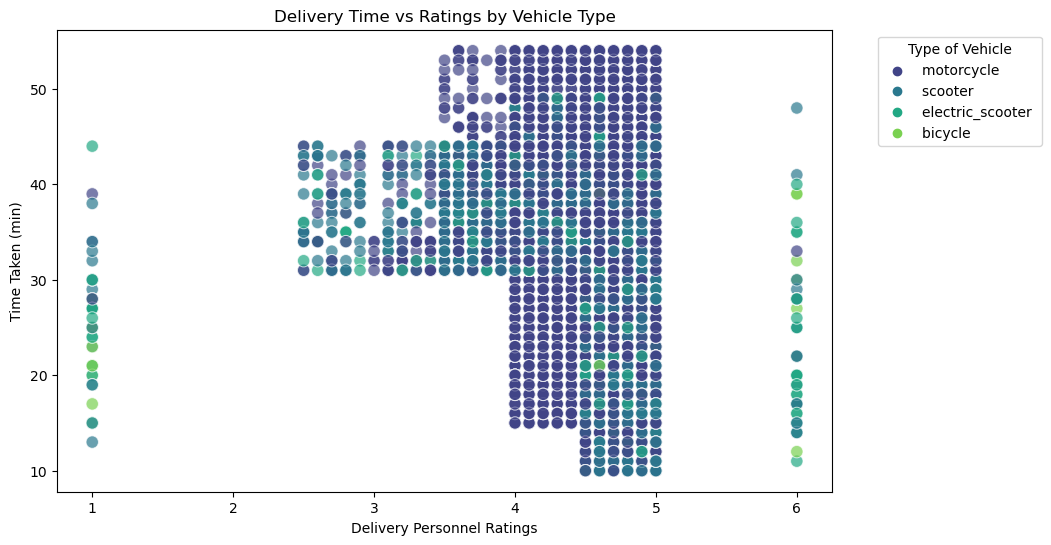

In [24]:
# Scatter plot comparing Delivery Ratings vs Time with Vehicle as hue
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, 
    x='Delivery_person_Ratings', y='Time_taken(min)', 
    hue='Type_of_vehicle', palette='viridis', s=80, alpha=0.7
)

plt.title('Delivery Time vs Ratings by Vehicle Type')
plt.xlabel('Delivery Personnel Ratings')
plt.ylabel('Time Taken (min)')
plt.legend(title='Type of Vehicle', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Insights:

Scatter plots help detect correlations between continuous variables.
In this case, it shows how delivery time is impacted by personnel ratings across vehicle types.


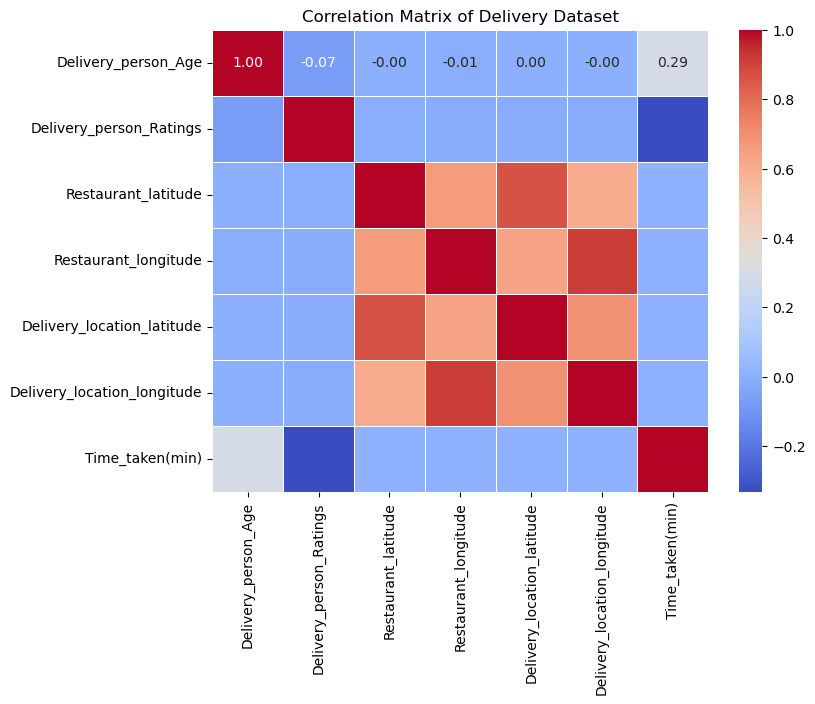

In [26]:
# Select only numerical columns
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr_matrix = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Matrix of Delivery Dataset')
plt.show()


Insights:

Heatmaps highlight relationships between variables.
For example, if delivery time shows a correlation with delivery person ratings or restaurant location, it will be easy to identify here.